Traffic congestion high level trends

1. Declining Public Transit Ridership 
2. Increased number of vehicles on Highways and roads, vehicle miles traveled  
3. Changing retail landscape - eCommerce/goods delivery vehicles, digital consumption  
4. Fuel Consumption and Air Quality  
5. Multi-modal transit choices 

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as stats
import matplotlib.pyplot as plt 
import os
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [3]:
os.chdir("/Users/kevalshah/Keval_Backup/Start Ups/California, 2018/Traffic Congestion Idea/Data/")

In [4]:
# Function to calculate YoY rate of change 
def calc_growth(Year1, Year2):
    
    Diff = Year2 - Year1
    change = round((Diff/Year1)*100,1)
    
    return '{}%'.format(change) 

In [5]:
# Read vehicle miles traveled (VMT) Millions in United States

VMT_data = pd.read_excel("/Users/kevalshah/Keval_Backup/Start Ups/California, 2018/Traffic Congestion Idea/Data/Highway/VMT_Highway.xlsx", parse_dates=["Month-Year"])
VMT_data.head(5)

,Month-Year,Unadjusted Vehicle Miles Traveled (Millions),Seasonally-adjusted Vehicle Miles Traveled (Millions)
0,2000-01-01,203442,227716
1,2000-02-01,199261,228693
2,2000-03-01,232490,230017
3,2000-04-01,227698,229166
4,2000-05-01,242501,229814


In [6]:
VMT_data.describe()

,Unadjusted Vehicle Miles Traveled (Millions),Seasonally-adjusted Vehicle Miles Traveled (Millions)
count,220.000000,220.000000
mean,248241.072727,248482.954545
std,17916.989873,9750.217267
min,199261.000000,224483.000000
25%,237404.250000,244625.500000
50%,251411.000000,248154.000000
75%,261433.750000,252661.750000
max,287342.000000,271403.000000


In [7]:
VMT_data.dtypes

Month-Year                                               datetime64[ns]
Unadjusted Vehicle Miles Traveled (Millions)                      int64
Seasonally-adjusted Vehicle Miles Traveled (Millions)             int64
dtype: object

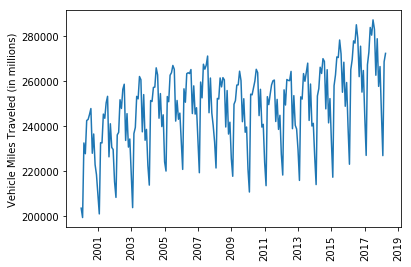

In [8]:
# Convert to datetime
VMT_data["Month-Year"] = pd.to_datetime(VMT_data["Month-Year"], format = "%m-%y")

# Plot
plt.plot(VMT_data["Month-Year"],VMT_data["Unadjusted Vehicle Miles Traveled (Millions)"])
plt.ylabel("Vehicle Miles Traveled (in millions)")
plt.xticks(rotation=90)
plt.show()

There appears to be seasonality and some non-linearity in the trend. Eye-balling the plot, it appears that the vehicle miles traveled is increasing overtime with some fluctuations.

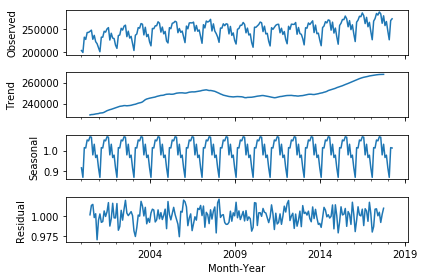

In [9]:
# Select columns for dataframe
VMT_Series = VMT_data[['Month-Year','Unadjusted Vehicle Miles Traveled (Millions)']]
VMT_Series = VMT_Series.set_index('Month-Year')

# Seasonal Decomposition of the series 
result = seasonal_decompose(VMT_Series, model='multiplicative', freq = 12)
result.plot()
plt.show()

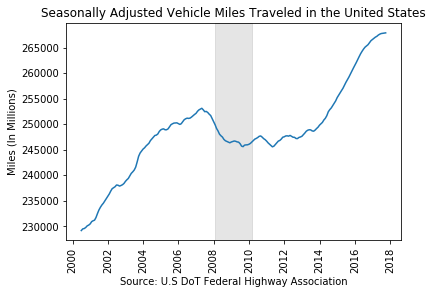

In [10]:
# Plot seasonally adjusted trend data

s = result.trend
plt.plot(s)
plt.ylabel("Miles (In Millions)")
plt.xlabel("Source: U.S DoT Federal Highway Association")
plt.title("Seasonally Adjusted Vehicle Miles Traveled in the United States")
plt.axvspan('2008-02-01','2010-02-28', color = "grey", alpha = 0.2)
plt.xticks(rotation=90)
plt.savefig("VMT.png", bbox_inches = "tight")

In [11]:
VMT_data_Year = VMT_Series.resample('AS').sum()

In [12]:
VMT_rate = calc_growth(VMT_data_Year["Unadjusted Vehicle Miles Traveled (Millions)"].iloc[10], 
                       VMT_data_Year["Unadjusted Vehicle Miles Traveled (Millions)"].iloc[17])
print(VMT_rate)

8.3%


The effects of recession can be observed in the data, between 2008 and 2012 the vehicle miles traveled in the United States declined. 

In [13]:
# VMT Per Capita by Automobile and Public Transit 
Transit = pd.read_excel("/Users/kevalshah/Keval_Backup/Start Ups/California, 2018/Traffic Congestion Idea/Data/Transit/TRANSIT.xlsx", sheetname = "Data")
Transit.head(5)

/Users/kevalshah/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,observation_date,TRANSIT
0,2008-04-01,908295
1,2008-05-01,912568
2,2008-06-01,884081
3,2008-07-01,910651
4,2008-08-01,890570


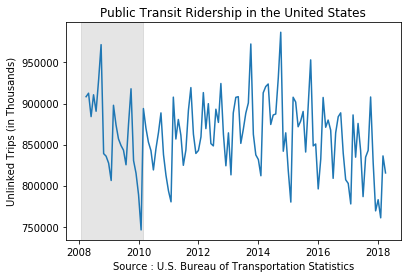

In [14]:
# Plot ridership
plt.plot(Transit["observation_date"], Transit["TRANSIT"])
plt.ylabel("Unlinked Trips (in Thousands)")
plt.xlabel("Source : U.S. Bureau of Transportation Statistics")
plt.title("Public Transit Ridership in the United States")
plt.axvspan('2008-02-01','2010-02-28', color = "grey", alpha = 0.2)
plt.show()

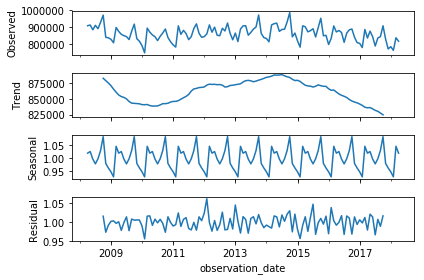

In [15]:
# Seasonal Decomposition of the series 
Transit = Transit.set_index('observation_date')

result = seasonal_decompose(Transit, model='multiplicative', freq = 12)
result.plot()
plt.show()

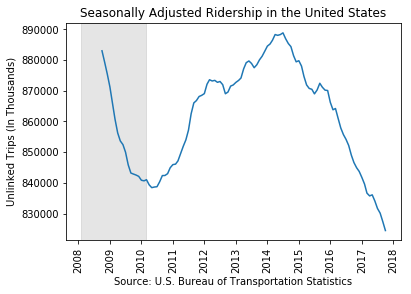

In [16]:
# Plot Trend
s = result.trend
plt.plot(s)
plt.ylabel("Unlinked Trips (In Thousands)")
plt.xlabel("Source: U.S. Bureau of Transportation Statistics")
plt.title("Seasonally Adjusted Ridership in the United States")
plt.axvspan('2008-02-01','2010-02-28', color = "grey", alpha = 0.2)
plt.xticks(rotation=90)
plt.savefig("Transit.png", bbox_inches = "tight")

In [17]:
# Calculate percentage decline
Transit_rate = calc_growth(Transit["TRANSIT"].iloc[84], Transit["TRANSIT"].iloc[120])
print(Transit_rate)

-9.6%


Public Transit Ridership is at its lowest level in last 10 years. Seasonally adjusted data indicates that between April 2015 and 2018, public transit ridership has declined 9.6%. 

In [18]:
# Vehicle sales, per capita vehicle in the United States 
V_Sales = pd.read_excel("/Users/kevalshah/Keval_Backup/Start Ups/California, 2018/Traffic Congestion Idea/Data/Vehicle/US Total Auto Sales.xlsx", sheetname= "Data")
V_Sales.dtypes

/Users/kevalshah/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


Year                          int64
Auto Sales (in Millions)    float64
Absolute Auto Sales         float64
dtype: object

In [19]:
# Licensed Drivers in the United States
V_Drivers = pd.read_excel("/Users/kevalshah/Keval_Backup/Start Ups/California, 2018/Traffic Congestion Idea/Data/Highway/Licensed-drivers-united-states-1990-2016.xlsx", sheetname = "Data")
V_Drivers.dtypes

/Users/kevalshah/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


Year                                       int64
Number of licensed drivers in thousands    int64
Absolute Licensed drivers                  int64
dtype: object

In [20]:
# Merge Vehicle sales and Drivers dataframes
V_Sales_Drivers = pd.merge(V_Sales, V_Drivers, left_on = "Year", right_on = "Year")

# Calculate vehicles per capita
V_Sales_Drivers["Vehicles Per 1000"] = round((V_Sales_Drivers["Absolute Auto Sales"]/V_Sales_Drivers["Absolute Licensed drivers"]*1000),1)

In [21]:
V_Sales_Drivers.head(4)

,Year,Auto Sales (in Millions),Absolute Auto Sales,Number of licensed drivers in thousands,Absolute Licensed drivers,Vehicles Per 1000
0,2005,209.3,209300000.0,200549,200549000,1043.6
1,2006,204.8,204800000.0,202810,202810000,1009.8
2,2007,197.6,197600000.0,205742,205742000,960.4
3,2008,161.9,161900000.0,208321,208321000,777.2


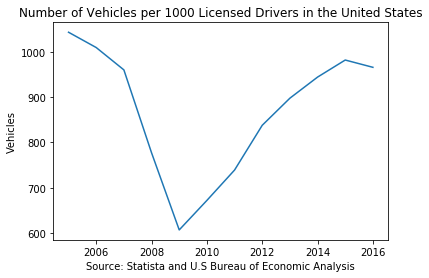

In [22]:
plt.plot(V_Sales_Drivers["Year"],V_Sales_Drivers["Vehicles Per 1000"])
plt.title("Number of Vehicles per 1000 Licensed Drivers in the United States")
plt.ylabel("Vehicles")
plt.xlabel("Source: Statista and U.S Bureau of Economic Analysis")
#plt.axvspan('2008','2010', color = "grey", alpha = 0.2)
plt.savefig("Vehicles_Per.png", bbox_inches = "tight")

Experts are citing the lightly used cars market and leasing for the decline in auto sales. 
The interest rates for New Auto 60 months loan was up 23% in Jan 2018 from same period in 2017. 

In [23]:
# Energy consumption by sector
# Share of transportation 

V_Energy = pd.read_excel("/Users/kevalshah/Keval_Backup/Start Ups/California, 2018/Traffic Congestion Idea/Data/EIA/Table_2.1_Energy_Consumption_by_Sector.xlsx", 
                         sheetname = "Transportation Sector")

V_Energy.describe()

/Users/kevalshah/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,Year,Total Energy Consumed by the Transportation Sector
count,69.000000,69.000000
mean,1983.000000,19519.388536
std,20.062403,6655.238390
min,1949.000000,7990.015000
25%,1966.000000,13100.235000
50%,1983.000000,20087.913000
75%,2000.000000,26204.673000
max,2017.000000,28858.342000


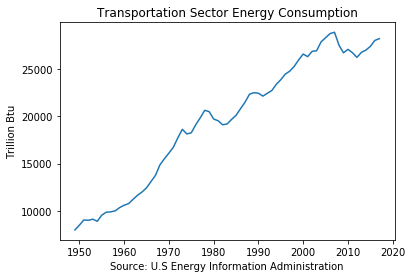

In [24]:
# Energy consumption by Transportation Sector

plt.plot(V_Energy["Year"], V_Energy["Total Energy Consumed by the Transportation Sector"])
plt.ylabel("Trillion Btu")
plt.xlabel("Source: U.S Energy Information Administration")
plt.title("Transportation Sector Energy Consumption")
#plt.axvspan('2008','2010', color = "grey", alpha = 0.2)
plt.savefig("V_Energy.png", bbox_inches = "tight")

In [25]:
V_Energy_Rate = calc_growth(V_Energy["Total Energy Consumed by the Transportation Sector"].iloc[16],
                            V_Energy["Total Energy Consumed by the Transportation Sector"].iloc[17])
print(V_Energy_Rate)

5.4%


About 29% of total Energy consumption in the United States in 2017 was Transportation Sector. Energy consumption grew by 0.7% between 2016 and 2017. 

In [26]:
# Trip Purpose Analysis 
nhts_data = pd.read_csv("/Users/kevalshah/Keval_Backup/Start Ups/California, 2018/Traffic Congestion Idea/Data/NHTS/trippub.csv")

In [27]:
#Subset with trip purpose columns
nhts_data_tp = nhts_data[['HOUSEID','PERSONID','TRPMILES','WHYTO','WHYTRP1S','WHYTRP90','TRIPPURP','URBRUR']]
nhts_data_tp = nhts_data_tp[nhts_data_tp['URBRUR'] == 1]

/Users/kevalshah/anaconda3/envs/myenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


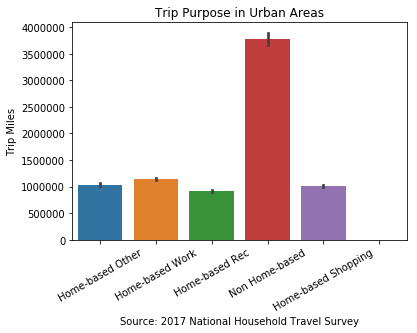

In [33]:
# Barplot with Trip Miles
ax = sns.barplot(x = "TRIPPURP", y = "TRPMILES", data = nhts_data_tp, estimator = np.sum)
labels = ['Home-based Other', 'Home-based Work', 'Home-based Rec','Non Home-based','Home-based Shopping']
ax.set(xlabel = "Source: 2017 National Household Travel Survey", ylabel = "Trip Miles", title = "Trip Purpose in Urban Areas")
ax.set_xticklabels(labels, rotation = 30)
plt.savefig("Trippurp.png", bbox_inches = "tight")

In [35]:
# Means of transportation by occupation 
T_OCC = pd.read_excel("/Users/kevalshah/Keval_Backup/Start Ups/California, 2018/Traffic Congestion Idea/Data/ACS_16_1YR/ACS_16_1YR_Final.xlsx", sheet_name = "Final")


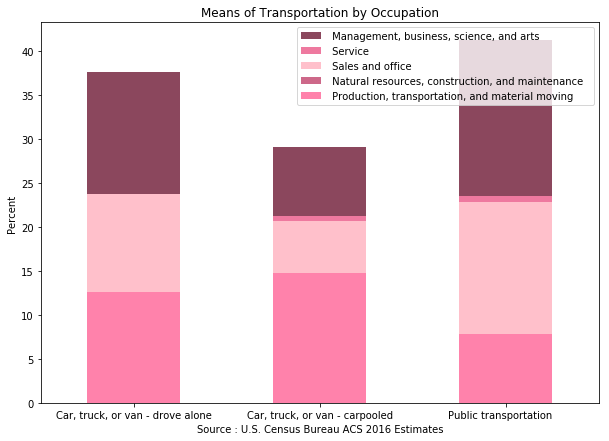

In [36]:
# Stacked bar plot 
fig, ax = plt.subplots(figsize=(10,7))  

occs = T_OCC['Occupation'].drop_duplicates()
colors = ["#8B475D", "#EE799F","#FFC0CB","#CD6889","#FF82AB"]

for num, occ in enumerate(occs):

    T_OCC[T_OCC['Occupation'] == occ].plot.bar(x='MEANS',y='Estimate', ax=ax, stacked=True, 
                                    color=colors[num], label=occ)
    plt.ylabel("Percent")
    plt.xlabel("Source : U.S. Census Bureau ACS 2016 Estimates")
    plt.title("Means of Transportation by Occupation")
    plt.xticks(rotation=0)
    plt.savefig("Tripocc.png", bbox_inches = "tight")

plt.show()

In [ ]:
# Link between labor productivity output and commute times 
# BLS data source 

# Commute times 1-30, 30-60, 60-90, 90+
# Mode of Transportation 
# Industry/Occupation 

# Plot mean commute times, productivity, time spent on other activities including socializing. 

# Commute times and employer retention 


In [1]:
#Commute times 
COMM = pd.read_excel("/Users/kevalshah/Keval_Backup/Start Ups/California, 2018/Traffic Congestion Idea/Data/ACS_16_5YR/ACS_16_5YR_S0801_with_ann.xlsx", sheet_name = "Filtered")
COMM.columns

NameError: name 'pd' is not defined

In [31]:
# Long format dataframe

COMM_Long = pd.melt(COMM, id_vars=['Commute']).sort_values(['variable','value'])
COMM_Long.head(8)

,Commute,variable,value
13,25 to 29,California,5.9
15,35 to 44,California,6.8
16,45 to 59,California,8.5
9,Less than 10,California,9.9
17,60 or more,California,11.3
10,10 to 14,California,12.9
12,20 to 24,California,14.5
14,30 to 34,California,15.0


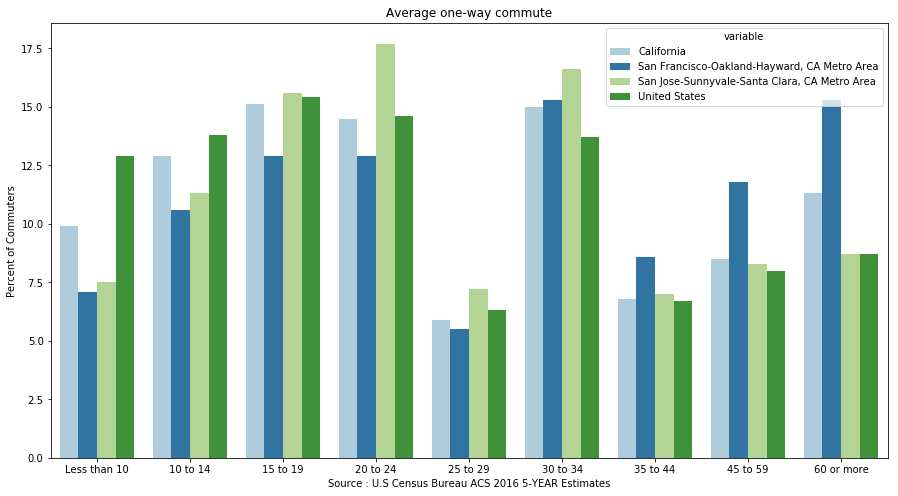

In [32]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x = "Commute", y="value", hue="variable", data = COMM_Long, palette = "Paired", order = ['Less than 10','10 to 14','15 to 19','20 to 24','25 to 29','30 to 34','35 to 44','45 to 59','60 or more'])
ax.set(xlabel = "Source : U.S Census Bureau ACS 2016 5-YEAR Estimates", ylabel = "Percent of Commuters", title = "Average one-way commute")
plt.savefig("Commute.png", bbbox_inches = "tight")

In [1]:
# Plot supply and demand of urban transportation 